___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Ingest the data to notebook

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
161,55,0,1,132,342,0,1,166,0,1.200,2,0,2,1
200,44,1,0,110,197,0,0,177,0,0.000,2,1,2,0
119,46,0,0,138,243,0,0,152,1,0.000,1,0,2,1
258,62,0,0,150,244,0,1,154,1,1.400,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.200,1,0,3,0
19,69,0,3,140,239,0,1,151,0,1.800,2,2,2,1
58,34,1,3,118,182,0,0,174,0,0.000,2,0,2,1
141,43,1,0,115,303,0,1,181,0,1.200,1,0,2,1
184,50,1,0,150,243,0,0,128,0,2.600,1,0,3,0
117,56,1,3,120,193,0,0,162,0,1.900,1,0,3,1


In [4]:
categoric = ["sex","cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.000,54.421,9.048,29.000,48.000,55.500,61.000,77.000
sex,302.000,0.682,0.466,0.000,0.000,1.000,1.000,1.000
cp,302.000,0.964,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,302.000,131.603,17.563,94.000,120.000,130.000,140.000,200.000
chol,302.000,246.500,51.753,126.000,211.000,240.500,274.750,564.000
fbs,302.000,0.149,0.357,0.000,0.000,0.000,0.000,1.000
restecg,302.000,0.526,0.526,0.000,0.000,1.000,1.000,2.000
thalach,302.000,149.570,22.904,71.000,133.250,152.500,166.000,202.000
exang,302.000,0.328,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,302.000,1.043,1.161,0.000,0.000,0.800,1.600,6.200


<AxesSubplot:>

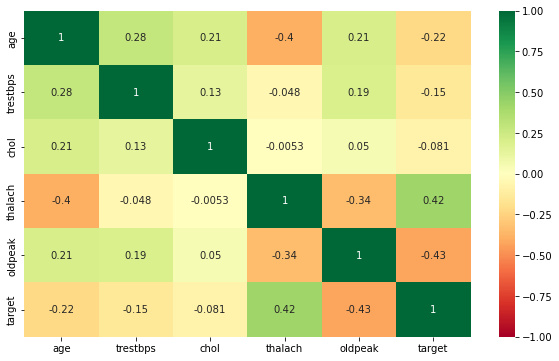

In [9]:
sns.heatmap(df.drop(categoric, axis=1).corr(), annot = True, vmin=-1, vmax=1, cmap="RdYlGn")

In [10]:
len(df.drop(categoric, axis=1).columns)

6

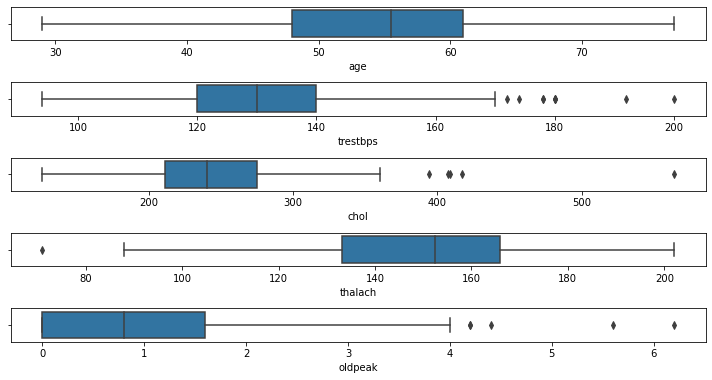

In [11]:
plt.subplots()
ct = 611
for col in df.drop(categoric, axis=1).columns:
    if col != "target":
        plt.subplot(ct)
        sns.boxplot(x=col, data=df)
        ct +=1
plt.tight_layout()

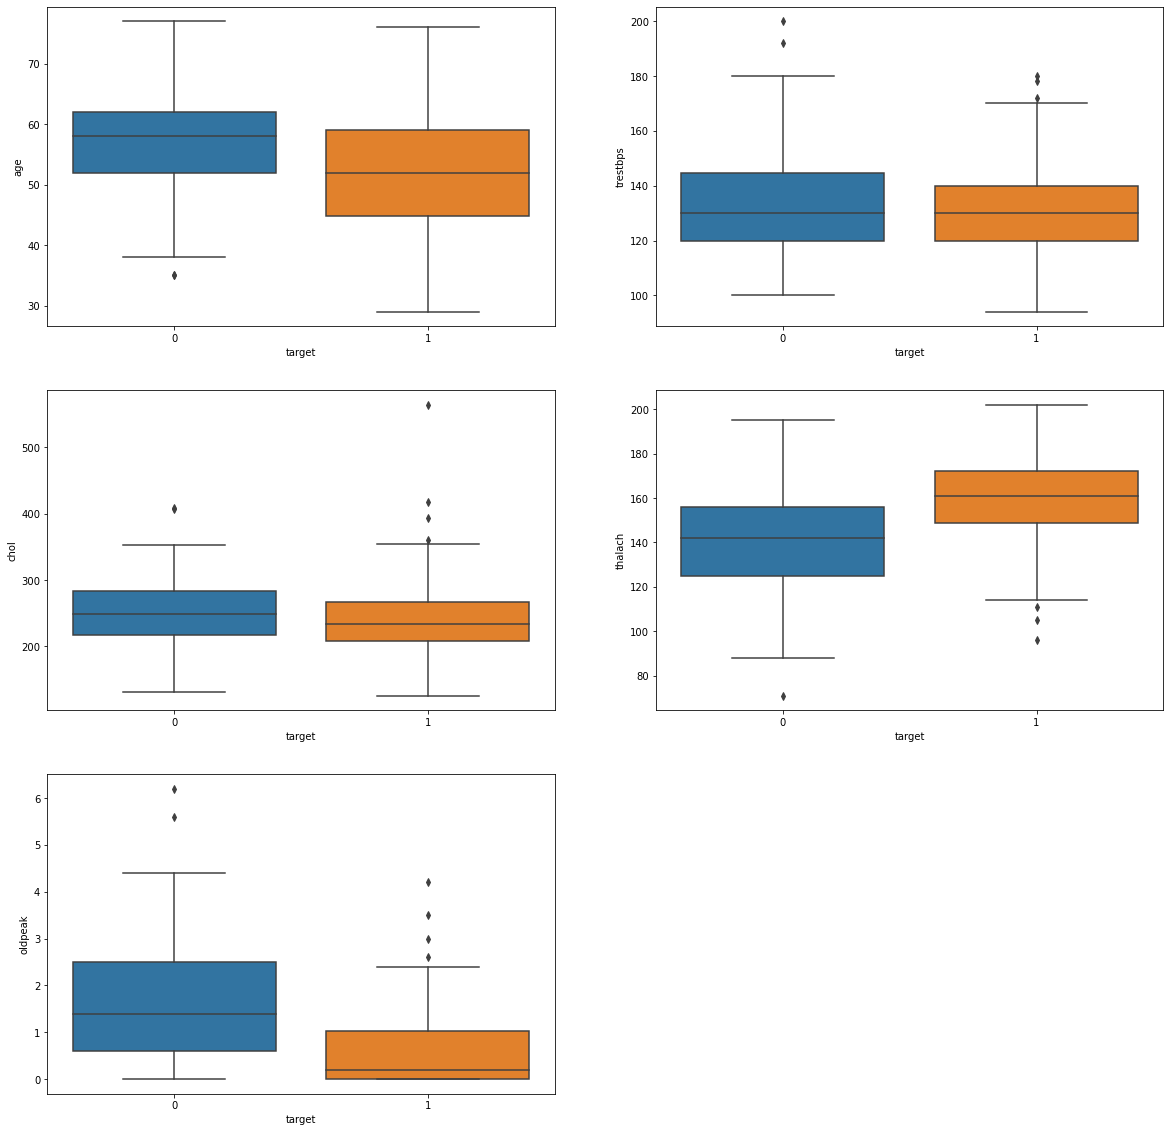

In [12]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.drop(categoric, axis=1).columns:
    if feature != "target":
        index += 1
        plt.subplot(3,2,index)
        sns.boxplot(x='target',y=feature,data=df)

In [13]:
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

# Data Preprocessing

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
X = df.drop("target", axis=1)
y = df.target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_model = LogisticRegression()

In [21]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [22]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [23]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[9.83178293e-01, 1.68217069e-02],
       [8.24556207e-01, 1.75443793e-01],
       [1.26446332e-01, 8.73553668e-01],
       [9.53580405e-01, 4.64195954e-02],
       [2.94914161e-02, 9.70508584e-01],
       [5.93255300e-02, 9.40674470e-01],
       [5.12692203e-01, 4.87307797e-01],
       [9.80924836e-01, 1.90751641e-02],
       [9.94070208e-01, 5.92979159e-03],
       [7.04643697e-01, 2.95356303e-01],
       [1.80229262e-01, 8.19770738e-01],
       [9.44748006e-01, 5.52519939e-02],
       [6.89768809e-02, 9.31023119e-01],
       [8.66095361e-01, 1.33904639e-01],
       [9.05527787e-03, 9.90944722e-01],
       [6.36594067e-02, 9.36340593e-01],
       [1.03049914e-02, 9.89695009e-01],
       [9.97521343e-01, 2.47865680e-03],
       [9.96651627e-01, 3.34837349e-03],
       [9.80829597e-01, 1.91704032e-02],
       [5.23439152e-01, 4.76560848e-01],
       [9.88065411e-01, 1.19345886e-02],
       [8.09161699e-01, 1.90838301e-01],
       [2.54416340e-01, 7.45583660e-01],
       [9.084647

In [24]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba
180,55,1,0,132,353,0,1,132,1,1.200,1,1,3,0,0,0.017
229,64,1,2,125,309,0,1,131,1,1.800,1,0,3,0,0,0.175
111,57,1,2,150,126,1,1,173,0,0.200,2,1,3,1,1,0.874
247,66,1,1,160,246,0,1,120,1,0.000,1,3,1,0,0,0.046
60,71,0,2,110,265,1,0,130,0,0.000,2,1,2,1,1,0.971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.100,1,4,3,0,0,0.002
19,69,0,3,140,239,0,1,151,0,1.800,2,2,2,1,1,0.910
143,67,0,0,106,223,0,1,142,0,0.300,2,2,2,1,1,0.780
79,58,1,2,105,240,0,0,154,1,0.600,1,0,3,1,0,0.343


In [25]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score

In [26]:
c_matrix_log = confusion_matrix(y_test, y_pred)
c_matrix_log

array([[34,  8],
       [ 9, 40]], dtype=int64)

In [27]:
clas_report_log = classification_report(y_test, y_pred)
print(clas_report_log)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        42
           1       0.83      0.82      0.82        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [28]:
log_recall = recall_score(y_test, y_pred)
log_recall

0.8163265306122449

## GridSearch

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",
                          n_jobs = -1)

In [31]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [32]:
grid_model.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}

In [33]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [34]:
y_pred_proba = grid_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.93911678, 0.06088322],
       [0.76516715, 0.23483285],
       [0.21438493, 0.78561507],
       [0.87229957, 0.12770043],
       [0.09319806, 0.90680194],
       [0.12906736, 0.87093264],
       [0.47349692, 0.52650308],
       [0.94887468, 0.05112532],
       [0.97340502, 0.02659498],
       [0.56539585, 0.43460415],
       [0.23402501, 0.76597499],
       [0.86484727, 0.13515273],
       [0.12004663, 0.87995337],
       [0.82642019, 0.17357981],
       [0.03579198, 0.96420802],
       [0.10237874, 0.89762126],
       [0.03564294, 0.96435706],
       [0.98490417, 0.01509583],
       [0.97852793, 0.02147207],
       [0.95072757, 0.04927243],
       [0.46153121, 0.53846879],
       [0.95809763, 0.04190237],
       [0.74145059, 0.25854941],
       [0.30140182, 0.69859818],
       [0.14152734, 0.85847266],
       [0.35043302, 0.64956698],
       [0.97979877, 0.02020123],
       [0.41077536, 0.58922464],
       [0.95422303, 0.04577697],
       [0.1127825 , 0.8872175 ],
       [0.

In [35]:
c_matrix_GS = confusion_matrix(y_test, y_pred)
c_matrix_GS

array([[34,  8],
       [ 7, 42]], dtype=int64)

In [36]:
c_matrix_log

array([[34,  8],
       [ 9, 40]], dtype=int64)

In [37]:
print(clas_report_log)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        42
           1       0.83      0.82      0.82        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [38]:
#Evaluation of test data
clas_report_GS = classification_report(y_test, y_pred)
print(clas_report_GS)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.84      0.86      0.85        49

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



In [39]:
y_train_pred = grid_model.predict(X_train_scaled)

In [40]:
#Evaluation of train data
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85        96
           1       0.85      0.92      0.89       115

    accuracy                           0.87       211
   macro avg       0.88      0.87      0.87       211
weighted avg       0.87      0.87      0.87       211



In [41]:
test_data["pred_GS"] = y_pred
test_data["pred_proba_GS"] = y_pred_proba[:,1]
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba,pred_GS,pred_proba_GS
180,55,1,0,132,353,0,1,132,1,1.200,1,1,3,0,0,0.017,0,0.061
229,64,1,2,125,309,0,1,131,1,1.800,1,0,3,0,0,0.175,0,0.235
111,57,1,2,150,126,1,1,173,0,0.200,2,1,3,1,1,0.874,1,0.786
247,66,1,1,160,246,0,1,120,1,0.000,1,3,1,0,0,0.046,0,0.128
60,71,0,2,110,265,1,0,130,0,0.000,2,1,2,1,1,0.971,1,0.907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.100,1,4,3,0,0,0.002,0,0.018
19,69,0,3,140,239,0,1,151,0,1.800,2,2,2,1,1,0.910,1,0.820
143,67,0,0,106,223,0,1,142,0,0.300,2,2,2,1,1,0.780,1,0.686
79,58,1,2,105,240,0,0,154,1,0.600,1,0,3,1,0,0.343,0,0.383


In [42]:
grid_log_recall = recall_score(y_test, y_pred)
grid_log_recall

0.8571428571428571

# Implement KNN and Evaluate

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier()

In [45]:
k_values = range(1,30)

param_grid = {"n_neighbors":k_values, "p":[1,2], "weights":["uniform", "distance"]}

In [46]:
knn_grid_model = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")

In [47]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [48]:
knn_grid_model.best_params_

{'n_neighbors': 22, 'p': 1, 'weights': 'distance'}

In [49]:
y_pred = knn_grid_model.predict(X_test_scaled)
y_train_pred = knn_grid_model.predict(X_train_scaled)

In [50]:
confusion_matrix(y_test, y_pred)

array([[33,  9],
       [ 6, 43]], dtype=int64)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        42
           1       0.83      0.88      0.85        49

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [52]:
confusion_matrix(y_train, y_train_pred)

array([[ 96,   0],
       [  0, 115]], dtype=int64)

In [53]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       115

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



In [54]:
knn_recall = recall_score(y_test, y_pred)
knn_recall

0.8775510204081632

# Visually compare models based on your chosen metric

In [55]:
rec_df = pd.DataFrame({'log_recall_score': log_recall,
                       'grid_log_recall_score': grid_log_recall,
                       'knn_recall_score': knn_recall,
                       }, index=[0])

<AxesSubplot:>

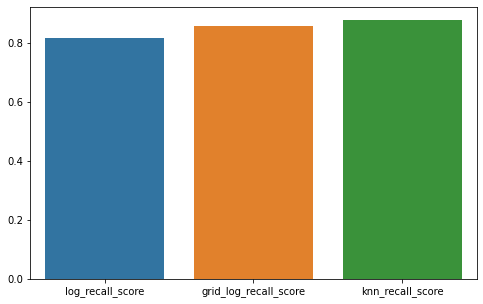

In [56]:
plt.figure(figsize=(8, 5))
sns.barplot(x=rec_df.columns, y=rec_df.iloc[0].values)

# Chose best model and make a random prediction 

In [64]:
new_observations = pd.DataFrame({"age": [29,34,74,52,42],
                    "sex": [1,1,0,1,1],
                    "cp": [2,1,0,1,1],
                    "trestbps": [100,140,180,105,150],
                    "chol": [180,249,210,255,240],
                    "fbs" : [0,0,0,1,0],
                    "restecg": [1,1,0,0,2],
                    "thalach": [90,120,90,100,108],
                    "exang": [0,0,0,1,0],
                    "oldpeak": [0.2,1,0.8,0.8,0],
                    "slope": [0,1,1,2,3],
                    "ca": [4,1,3,2,0],
                    "thal": [3,3,2,2,2]})

In [65]:
new_observations_scaled = scaler.transform(new_observations)

In [66]:
pred = knn_grid_model.predict(new_observations_scaled)
pred

array([0, 0, 0, 0, 1], dtype=int64)

In [67]:
knn_grid_model.predict_proba(new_observations_scaled)

array([[0.64441721, 0.35558279],
       [0.79752386, 0.20247614],
       [0.56736303, 0.43263697],
       [0.70339138, 0.29660862],
       [0.0891172 , 0.9108828 ]])

In [68]:
new_observations["pred"] = pred
new_observations

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred
0,29,1,2,100,180,0,1,90,0,0.200,0,4,3,0
1,34,1,1,140,249,0,1,120,0,1.000,1,1,3,0
2,74,0,0,180,210,0,0,90,0,0.800,1,3,2,0
3,52,1,1,105,255,1,0,100,1,0.800,2,2,2,0
4,42,1,1,150,240,0,2,108,0,0.000,3,0,2,1
